In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("Churn_Modelling.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
X = data[["RowNumber","CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard","IsActiveMember","EstimatedSalary"]]
y = data["Exited"]

In [6]:
X

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,619,42,2,0.00,1,1,1,101348.88
1,2,608,41,1,83807.86,1,0,1,112542.58
2,3,502,42,8,159660.80,3,1,0,113931.57
3,4,699,39,1,0.00,2,0,0,93826.63
4,5,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...
9995,9996,771,39,5,0.00,2,1,0,96270.64
9996,9997,516,35,10,57369.61,1,1,1,101699.77
9997,9998,709,36,7,0.00,1,0,1,42085.58
9998,9999,772,42,3,75075.31,2,1,0,92888.52


In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
Y_pred = rf_model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8536


In [13]:
confusion_matrix = metrics.confusion_matrix(y_test, Y_pred)

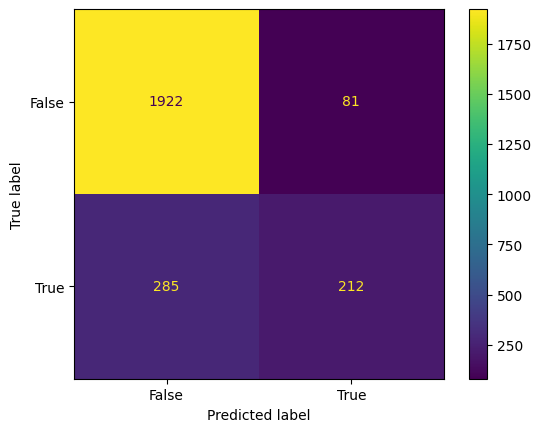

In [14]:
x=metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
x.plot()
plt.show()

In [15]:
new_customer = pd.DataFrame(X)

In [16]:
new_customer = scaler.transform(new_customer)

In [17]:
churn_prob = rf_model.predict_proba(new_customer)[0][1]
print("Churn Probability:", churn_prob)

Churn Probability: 0.29


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
model1=GradientBoostingClassifier(criterion='friedman_mse',random_state=0)
model1.fit(X_train,y_train)
output1=model1.predict(X_test)
print("Accuracy :",accuracy_score(output1,y_test))

Accuracy : 0.862
